# Imporing the Packages

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

# Importing the Data

In [356]:
raw_data_frame = pd.read_csv("index2018.csv")

In [357]:
df_comp = raw_data_frame.copy()

# Examining the Data

In [358]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [359]:
#df_comp # show maximum data

In [360]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [361]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [362]:
df_comp.isna().any()

date      False
spx       False
dax       False
ftse      False
nikkei    False
dtype: bool

# Plotting the data

In [363]:
df_comp.columns

Index(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')

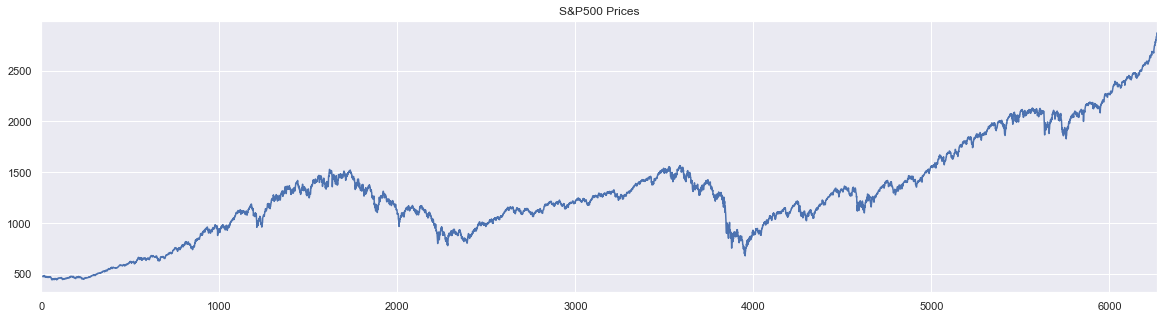

In [364]:
df_comp.spx.plot( figsize=(20,5), title = "S&P500 Prices" )

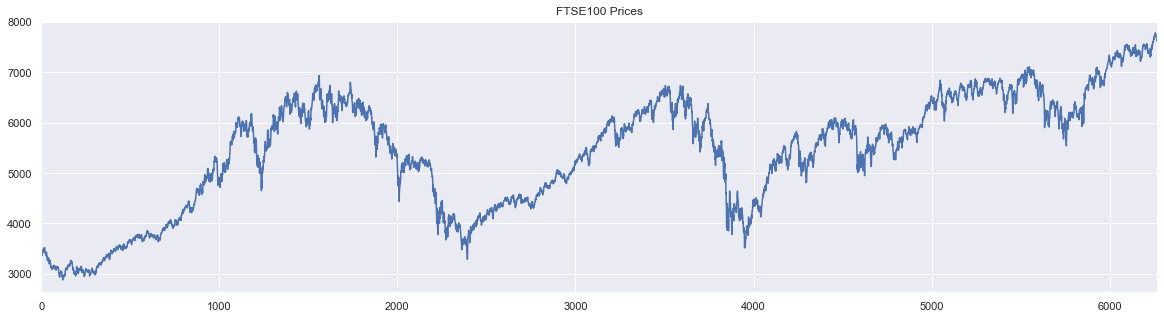

In [365]:
df_comp.ftse.plot( figsize=(20,5), title = "FTSE100 Prices" )

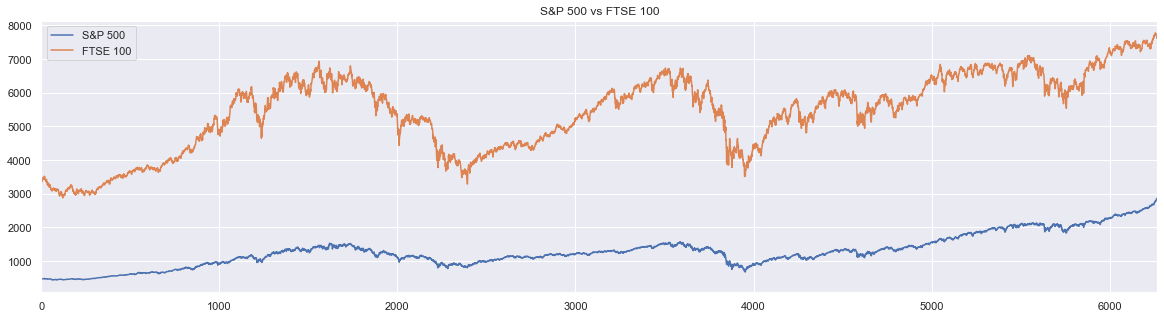

In [366]:
df_comp.spx.plot( figsize=(20,5), title = "S&P500 Prices" , label="S&P 500")
df_comp.ftse.plot( figsize=(20,5), title = "FTSE100 Prices", label="FTSE 100" )
plt.title("S&P 500 vs FTSE 100")
plt.legend()
plt.show()

# The QQ Plot

In [367]:
import scipy.stats
import pylab

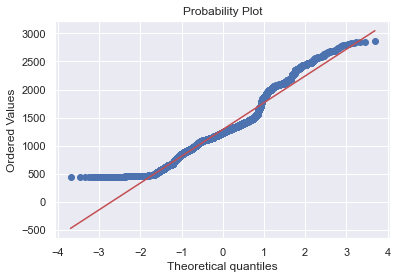

In [368]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

# Length of the Time Period

In [369]:
# Describe method isn't capable of processing text columns, and date here is saved as text.
df_comp.date.describe()
# Check next cell

count           6269
unique          6269
top       28/07/2005
freq               1
Name: date, dtype: object

In [370]:
df_comp.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [371]:
type(df_comp.date[0])

str

# From Text to Date

In [372]:
# Assumption "mm/dd/yyyy" as default format
# Both our date columns is given in "dd/mm/yyyy", so "dayfirst = True"
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [373]:
type(df_comp.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [374]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

# Setting the index (Set datetime column as DataFrame index)

In [375]:
df_comp.set_index("date", inplace=True)

In [376]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Setting the Desired Frequency

In [377]:
# The values this argument can take are specific letters of the alphabet
# 'h' - hourly
# 'w' - weekly
# 'd' - daily
# 'm' - monthly
# 'a' - annually or yearly
# 'b' - business days

# Data measured once per year is "annual", rather than "yearly", so we use 'a' instead of 'y'

In [378]:
df_comp = df_comp.asfreq('d')

In [379]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [380]:
# So better to use 'business days' - 'b' instead of 'daily' -'d'

In [381]:
df_comp = df_comp.asfreq('b')

In [382]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Handling Missing Values

In [383]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
1994-01-14,False,False,False,False
1994-01-17,False,False,False,False
1994-01-18,False,False,False,False
1994-01-19,False,False,False,False


In [384]:
df_comp.isna().any()

spx       True
dax       True
ftse      True
nikkei    True
dtype: bool

In [385]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [386]:
# Front Filling: Assigns the value of the previous period
# Back Filling: Assigns the value for the next period
# Assign the same value: Assign the average to all the missing values within the time-series

In [387]:
# Front filling apply to SPX
df_comp.spx = df_comp.spx.fillna(method = "ffill")

In [388]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [389]:
# Back filling apply to FTSE
df_comp.ftse = df_comp.ftse.fillna(method = "bfill")

In [390]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [391]:
# Mean/Average filling apply
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

In [392]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [393]:
# Front filling apply to NIKKEI
df_comp.nikkei = df_comp.nikkei.fillna(method = "ffill")

In [394]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [395]:
df_comp_orig = df_comp.copy()

# Simplifying the Data

In [396]:
# Analyzing how the S&P 500 performs
# I'm going to remove FTSE, NIKKEI and DAX
# 1. First reason for removing these, That less data we load, the faster we can manipulate it.
# 2. Clarity. Easier to keep track of the dataset

In [397]:
df_comp['market_value'] = df_comp.spx

In [398]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.672753,1288.642547
std,487.868210,2752.604984,1145.568370,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [399]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [400]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


# Splitting up the data

In [401]:
# We have to split our data in two sets:
# Training data
# Testing data

# Note: Shuffling is impossible in time-series data

# Training set: From beginning up to cutoff point
# Testing set: From cutoff point until the end

In [402]:
# Let's split using 80/20 Ratio

In [403]:
size = int(len(df_comp)*0.8)
ts_size = df_comp.shape[0] - tr_size # It's however useless

In [404]:
df = df_comp.iloc[:size]

In [405]:
df_test = df_comp.iloc[size:]

In [406]:
df.describe()

,market_value
count,5021.000000
mean,1091.651926
std,292.559287
min,438.920000
25%,914.620000
50%,1144.650000
75%,1316.280729
max,1570.252238


In [407]:
df_test.describe()

,market_value
count,1256.000000
mean,2076.134514
std,268.352345
min,1541.613396
25%,1892.094915
50%,2064.879102
75%,2186.932571
max,2872.867839


In [408]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [409]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


# Weird Time Series Types (Examples)

## 1. White Noise
#### Its a flat data, with almost identical standard deviation and mean, but describes no clear pattern.
#### Patterns in this time series doesn't satisfy autocorrelation between past and present events. 

####### Create a time series using White Noise (Normal Distribution) with Standard Deviation & Mean of S&P market_value

?np.random.normal(loc=0.0, scale=1.0, size=None)
####### loc = mean
####### scale = standard deviation
####### Length of series

In [410]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [411]:
df['wn'] = wn

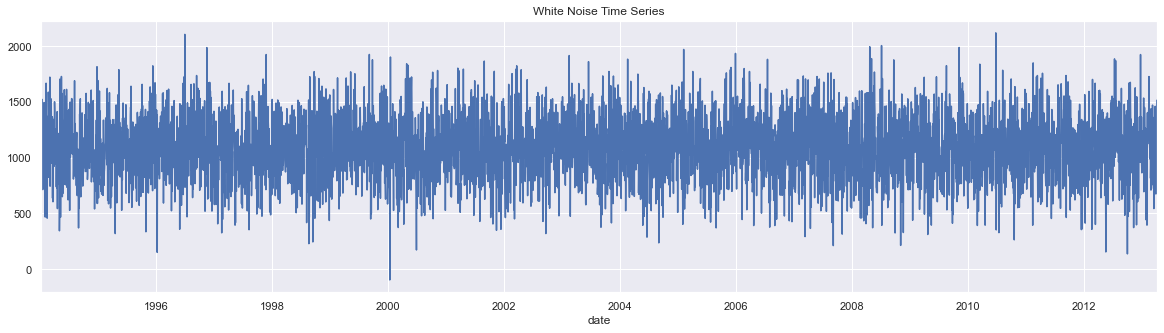

In [412]:
df.wn.plot(figsize = (20,5))
plt.title('White Noise Time Series')
plt.show()

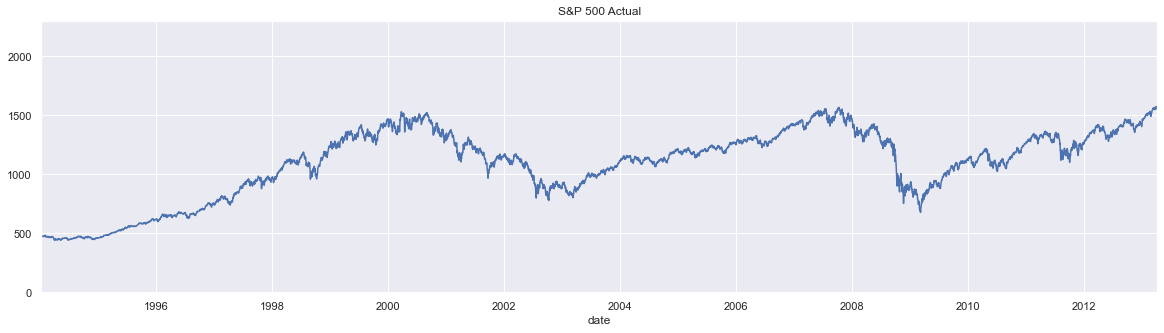

In [413]:
df.market_value.plot(figsize = (20,5))
plt.title('S&P 500 Actual')
plt.ylim(0, 2300)
plt.show()

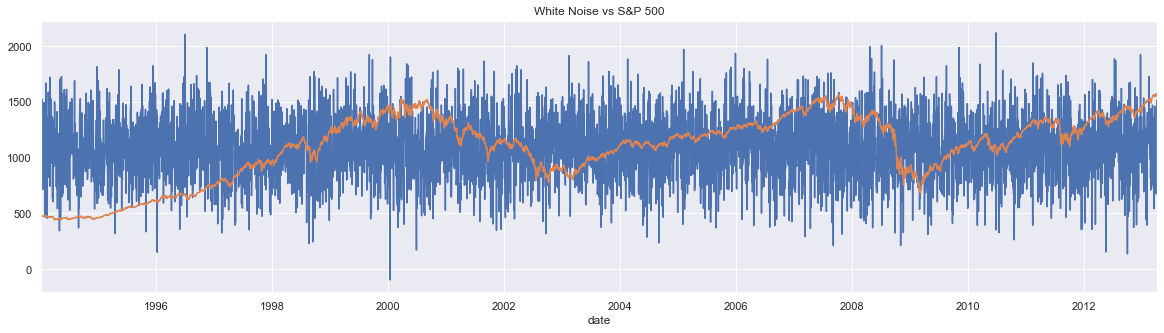

In [414]:
df.wn.plot(figsize = (20,5), label='White Noise')
df.market_value.plot(figsize = (20,5), label='S&P500')
plt.title('White Noise vs S&P 500')
plt.show()

## 2. Random Walk

In [415]:
rw = pd.read_csv('RandWalk.csv')

In [416]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)

In [417]:
rw.set_index('date', inplace=True)

In [418]:
rw = rw.asfreq('b')

In [419]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [420]:
df['rw'] = rw.price

In [421]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,728.022405,1122.139662
1994-01-10,475.27,913.117884,1080.347860
1994-01-11,474.13,856.512819,1082.095245
1994-01-12,474.17,1522.680725,1083.639265
1994-01-13,472.47,1298.357770,1067.146255


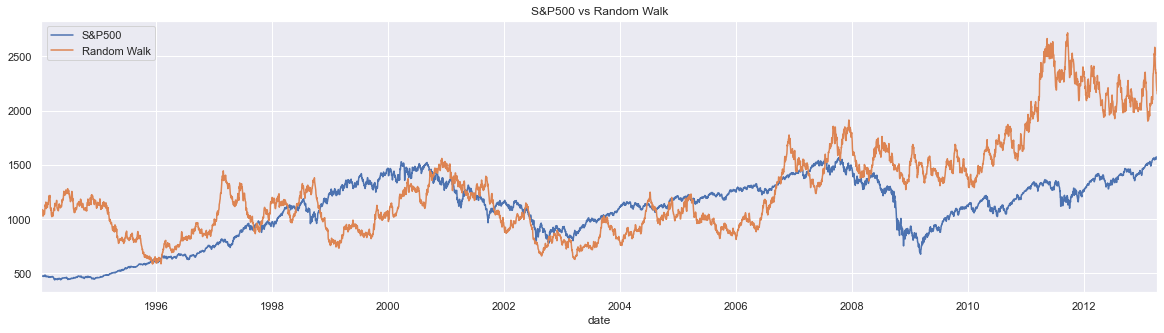

In [422]:
df.market_value.plot(figsize = (20,5), label='S&P500')
df.rw.plot(label='Random Walk')
plt.legend()
plt.title("S&P500 vs Random Walk")
plt.show()

# Stationarity

In [423]:
# "Weak-form" stationarity or "Covariance" stationarity
# When two sample of same length have identical "covariance" regardless of their starting points

In [424]:
# Covariance Stationarity assumptions

# Constant u (mean)
# Constant std (standard deviation)
# Cov (x_n, x_n+k) = Cov (x_m, x_m+k) or Cov (x_n, x_n+k) ~ Cov (x_m, x_m+k)

In [425]:
# White Noice

# Mean is always 0
# Constant std (Standard deviation)
# Autocorrelation between lags is always zero
# hence, Cov (x_n, x_n+k) = Cov (x_m, x_m+k) * std_1 * std_2 = 0

In [426]:
# Generally speaking, we always refer to 
# Stationarity = Covariance stationarity

# because in Strict Stationarity
# Distribution of two samples is also identical
# Which is rarely observed in natural world

# Import Librarites to determine Stationarity & Seasonality

In [427]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose


# Deremining "Weak-Form" Stationarity

In [428]:
# Dicky-Fuller test

In [429]:
# Hypothesis
## H_not: Autoccorelation < 1  (Representing Non-stationarity)
## H_alt: Autocorrelation = 1 (Representing stationarity)

In [430]:
# If test statistic < critical value,
# then we rejec the null hypothesis
# So the data comes from stationary process

In [431]:
sts.adfuller(df.market_value)

(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [432]:
sts.adfuller(df.rw)

(-1.3286073927689703,
 0.6159849181617391,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

In [433]:
sts.adfuller(df.wn)

(-71.36410101333685,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70682.85533563554)

In [434]:
# In random walks, the covariances of two such intervals with identical size would very rarely be equal
# We expect Random Walks to be a non-stationary process

# Seasonality

In [435]:
# In time-series, seasonality suggests that "Certain trends will appear on cyclical basis"
# For instance, temperatures rise and fall based on "time of a day" and "months of a year"
# There are several several ways to test the Seasonality.

# One approach is to decompose the sequence, known as decomposition.

# DECOMPOSITION
# In decomposition, we split up the time-series into three effects:
# Trend --> represents the pattern consistant throughout the data
# Seasonal --> represents cyclical effects due to seasonality
# Residual --> Error of prediction (Difference between the actual data, and model we fit)

# Simplest form of decomposition is called "Naive"

# "Naive" Decomposition
#  We expect linear relationship between the three parts and the observed time-series.

# Two main appraoches of Naive Decomposition:
# 1. Additive  (Observed = trend + seasonal + residual)
# 2. Multiplicitive (Observed = trend * seasonal * residual)

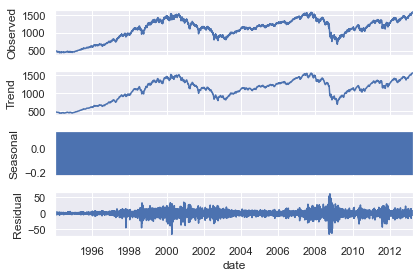

In [436]:
# Naive Decomposition: Additive approach
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

In [437]:
# The above result shows no seasonality in the data, because seasonality looks flat. 
# (Model: Additive)

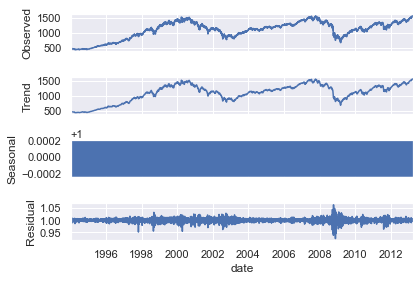

In [438]:
# Naive Decomposition: Multiplicitive approach
s_dec_multiplicitive = seasonal_decompose(df.market_value, model = "multiplicitive")
s_dec_multiplicitive.plot()
plt.show()

In [439]:
# The above result shows no seasonality in the data, because seasonality looks flat. 
# (Model: Multiplicitive)

In [440]:
# CONCLUSION: So, it can be said there's no seasonality in S&P prices
# Trend follows the prices closely.
# Residual shows sensitivity to Market crashes and flat otherwise.

# Auto Correlation Function (ACF)

In [441]:
# Correlation between our data and multiple lagged versions of itself

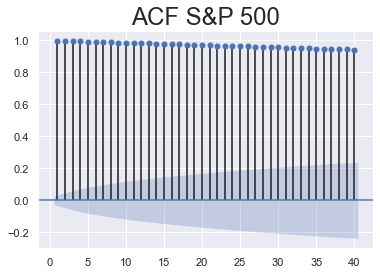

In [442]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P 500", size = 24)
plt.show()

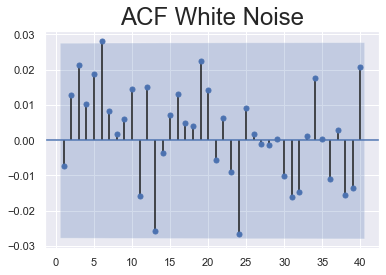

In [443]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF White Noise", size = 24)
plt.show()

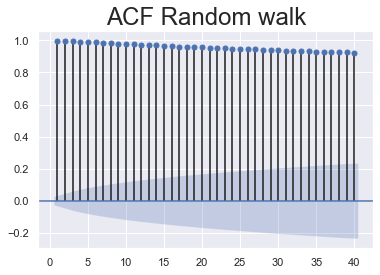

In [444]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF Random walk", size = 24)
plt.show()

# Partial Auto Correlation Function (PACF)

In [445]:
# Correlation between our data and multiple lagged versions of itself partially

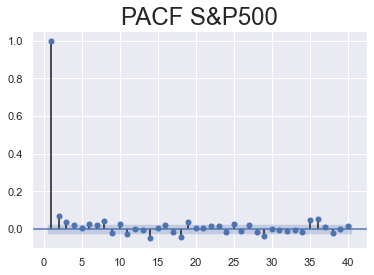

In [446]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P500", size = 24)
plt.show()

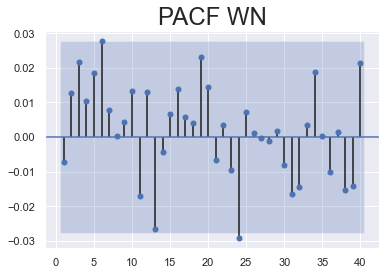

In [447]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

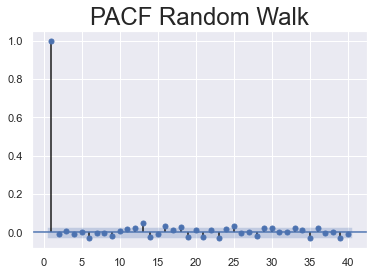

In [448]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Random Walk", size = 24)
plt.show()

# Picking the Correct Model

In [449]:
# Read the rules in snapshots in the folder

In [450]:
# We usually start with a sompler model and expand it as long as it follows several conditions

# New coefficients for the more complex model should be significantly different from zero

# If thats not true, the estimators for these parameters are essentially zero
# Therefore, they won't help us predict future values
# This means they hold no predictive powers
# So we must omit them and revert back to the simpler model

# We want our model to me "Parsimonious" --> "as simple as possible"
# Generally, we prefer a Simpler model to a Complicated one
# Unless the complex model provides singificanly better predictions

# To test the significance, we perform Log-Likelihood Ratio Test (LLR-Test)
# Note: LLR Test can only be performed on model with different degrees of freedom. 

# So, when comparing several models with same number of lags, we need to compare
# Information criteria
# The lower the coefficient, the less data model requires to make accurate predictions
# Two most prominent measurements are known as AIC and BIC.
# Because we prefer the simpler model, we prefer the model with lower AIC and BIC coefficients.

# If our model fits well, there should be no trend we failed to account for.
# Therefore residuals of the model should resemble white noise
# So there should be no patterns we have missed, without overtraining our model.



# The Autoregressive Model (AR)

In [451]:
# This model relies on past period values and past periods only to predict current period values.

In [452]:
# Its a LINEAR MODEL, where current period values are a sum of past outcomes multiplied by a numeric factor

In [453]:
# x_t = Constant (C) + Coefficinet (Phi) * x_t-1 + Bias (E_t)

# Bias (E_t) is known as Residual. These are usually unpredictable differences.

In [454]:
# Coefficient (Phi) should alwasys be between -1 and +1.
# Otherwise it will create an exponential effect

In [455]:
# The more lags are included, the more complicated becoems our models,
# The model comlicates it becomes, the more coefficient it has
# The more coefficients it has, more likely that some of them are not significant

In [456]:
# A model which takes more data into account is usually better.

In [457]:
# To determine the correct number of lags, we should incorporate in our model, we rely on ACF and PACF. 

# Examine ACF and PACF graphs (FTSE values)

In [470]:
df_c2 = raw_data_frame.copy()
df_c2.date = pd.to_datetime(df_c2.date, dayfirst = True)
df_c2.set_index("date", inplace=True)
df_c2=df_c2.asfreq('b')
df_c2=df_c2.fillna(method="ffill")

In [471]:
df_c2['market_value']=df_c2.ftse

In [472]:
del df_c2['ftse']
del df_c2['dax']
del df_c2['spx']
del df_c2['nikkei']

In [474]:
size = int(len(df_c2)*0.8)
df, df_test = df_c2.iloc[:size], df_c2.iloc[size:]

### 1. The ACF

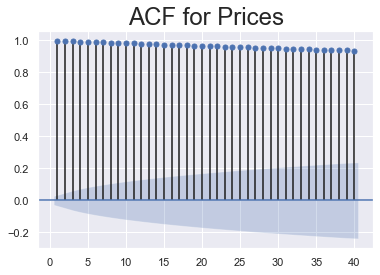

In [476]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title("ACF for Prices", size=24)
plt.show()

### 2. The PACF

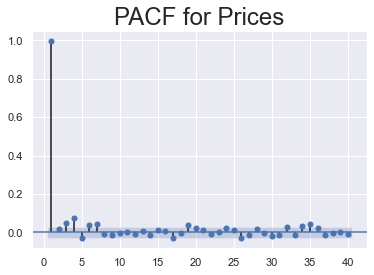

In [478]:
sgt.plot_pacf(df.market_value, zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title("PACF for Prices", size=24)
plt.show()

# The ARMA Method

In [481]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

## Simple AR Model

In [500]:
model_ar = ARMA(df.market_value, order=(1,0))
# In Order (1,0)
# First value (1): The number of past values we wish to incorporate into the model
# Second value (0): Residual value, and we are not taking any of the residual value into consideration

In [501]:
results_ar = model_ar.fit()

In [502]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Mon, 13 Apr 2020   AIC                          55251.195
Time:                        22:08:47   BIC                          55270.759
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5047.3035    486.739     10.370      0.000    4093.313    6001.294
ar.L1.market_value     0.9985      0.001   1298.889      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Model

In [508]:
model_ar2 = ARMA(df.market_value, order=(2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Mon, 13 Apr 2020   AIC                          55251.742
Time:                        22:09:45   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    495.696     10.268      0.000    4118.094    6061.188
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4628           +0.0000j           58.4628            0.5000
-----------------------------------------------------------------------------
"""

In [509]:
model_ar3 = ARMA(df.market_value, order=(3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.867
Method:                       css-mle   S.D. of innovations             59.178
Date:                Mon, 13 Apr 2020   AIC                          55241.735
Time:                        22:09:48   BIC                          55274.342
Sample:                    01-07-1994   HQIC                         55253.161
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5066.8114    519.025      9.762      0.000    4049.541    6084.082
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0308      0.020     -1.562      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.465      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1851           -4.5168j            4.5206           -0.2565
AR.3           -0.1851           +4.5168j            4.5206            0.2565
-----------------------------------------------------------------------------
"""

In [510]:
model_ar4 = ARMA(df.market_value, order=(4,0))
results_ar4 = model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Mon, 13 Apr 2020   AIC                          55217.130
Time:                        22:09:49   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    559.969      9.089      0.000    3992.121    6187.161
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

# Log Likelihood Ratio (LLR Test)

In [534]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [535]:
model_a1 = ARMA(df.market_value, order=(1,0))
model_a2 = ARMA(df.market_value, order=(2,0))
LLR_test(model_a1, model_a2)

0.228

In [536]:
model_a2 = ARMA(df.market_value, order=(2,0))
model_a3 = ARMA(df.market_value, order=(3,0))
LLR_test(model_a2, model_a3)

0.001

In [538]:
model_a3 = ARMA(df.market_value, order=(3,0))
model_a4 = ARMA(df.market_value, order=(4,0))
LLR_test(model_a3, model_a4)

0.0

In [539]:
model_a4 = ARMA(df.market_value, order=(4,0))
model_a5 = ARMA(df.market_value, order=(5,0))
LLR_test(model_a4, model_a5)

0.035

In [540]:
model_a5 = ARMA(df.market_value, order=(5,0))
model_a6 = ARMA(df.market_value, order=(6,0))
LLR_test(model_a5, model_a6)

0.005

In [541]:
model_a6 = ARMA(df.market_value, order=(6,0))
model_a7 = ARMA(df.market_value, order=(7,0))
LLR_test(model_a6, model_a7)

0.002

In [542]:
model_a7 = ARMA(df.market_value, order=(7,0))
model_a8 = ARMA(df.market_value, order=(8,0))
LLR_test(model_a7, model_a8)

0.571

In [543]:
# So LLR test p-value is not singificant for "8 lags", it means number of lags must be set to 7 
# in order to get good results, even if some of the coefficients are not significant

# Using Returns

In [544]:
# AR models make accurate forecasts with stationary data. So let's check if this FTSE data is stationary or not

In [545]:
sts.adfuller(df.market_value)

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

In [546]:
# With signifiacnt vlaue of 0.33 (p-value), it failed to reject the null hypothesis,
# which proves thats the data is non-stationary, and/or extracted from non-stationary process

# We shouldn't rely on AR Models to make accurate predictions on non-stationary data
# Then, better solution is to transform the dataset, so that it fits the "stationary" assumptions.

In [547]:
# In finance, the common approach is to use returns instead of prices, when measuring financial indices.

# Returns --> indicates the percentage change between the values for two consecutive periods

In [548]:
# Return (R) > 0, indicates positive returns, surge

# Return (R) <0, showcases negative returns, decline

In [552]:
# ( (P_t - P_t-1) / P_t-1) * 100
# Default value is 1; i.e. pct_change(1)
# Pandas returns percentages as real numbers
# So we need to multiply all numbers by 100; i.e. mul(100) or multiply by 100
df['returns'] = df.market_value.pct_change(1).mul(100)

In [553]:
df.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


In [554]:
# Note: First value of "returns" is NaN, because it couldn't compard to the previous value, as there's no previous value

# ELiminate the first value, because first price value can't be compared to any value before it, which makes it ambiguent
df = df.iloc[1:]

In [555]:
df.head()

,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842


In [556]:
sts.adfuller(df.returns)

(-12.770265719497228,
 7.798058336038662e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

In [557]:
# This states the data comes from a stationary prices, and now we can apply AR methods on this data

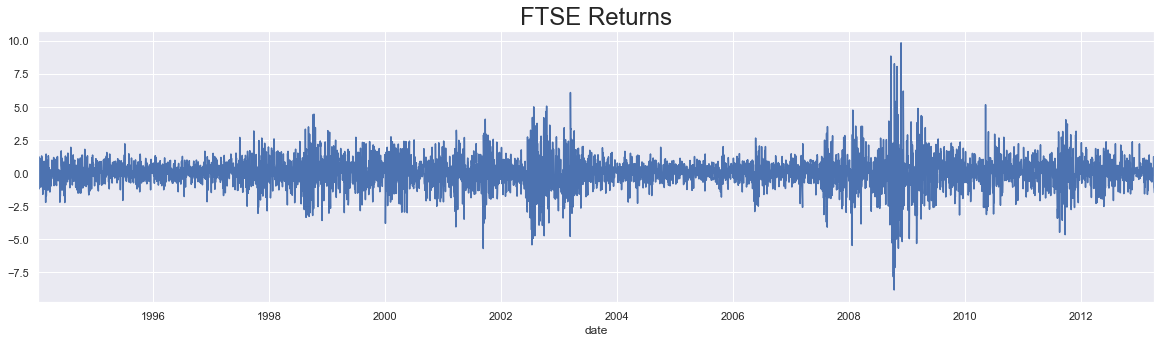

In [564]:
df.returns.plot(figsize = (20,5))
plt.title("FTSE Returns", size=24)
plt.show()

Text(0.5, 1.0, 'FTSE prices')

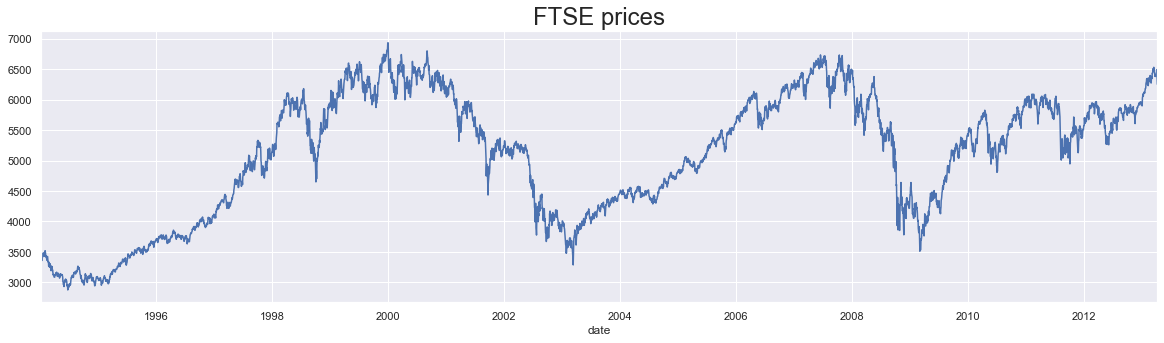

In [565]:
df.market_value.plot(figsize=(20,5))
plt.title("FTSE prices", size=24)

# ACF & PACF for RETURNS

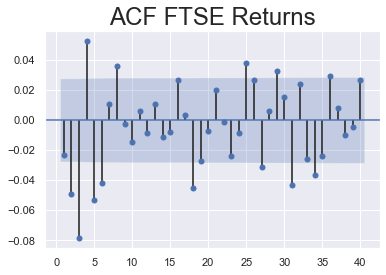

In [566]:
sgt.plot_acf(df.returns, lags=40, zero=False)
plt.title("ACF FTSE Returns", size=24)
plt.show()

In [ ]:
# In the figure above,
# Consecutive values move in different directions
# WHich indicates
# Some form of natural adjustment occuring in the market

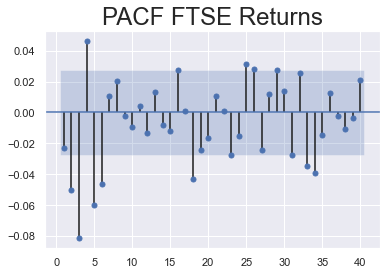

In [568]:
sgt.plot_pacf(df.returns, lags=40, zero=False, method=('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

In [569]:
# Its almost identical to ACF plot

# AR(1) for Returns

In [572]:
model_ret_ar1 = ARMA(df.returns, order=(1,0))
results_ret = model_ret_ar1.fit()
results_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 14 Apr 2020   AIC                          15865.497
Time:                        13:59:09   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

In [571]:
# This model is not quite singificant because Both P-values are higher than "significance value"

# Higher AR-lag models for Returns

In [574]:
model_ret_ar2 = ARMA(df.returns, order=(2,0))
results_ret_ar2 = model_ret_ar2.fit()
results_ret_ar2.summary()
# THis model is significant than model with 1 lag, as this model as Lag2 (L2) is in significant limit 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Tue, 14 Apr 2020   AIC                          15854.911
Time:                        14:01:46   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [578]:
model_ret_ar3 = ARMA(df.returns, order=(3,0))
results_ret_ar3 = model_ret_ar3.fit()
results_ret_ar3.summary()
# THis model is even more significant than model with 2 lags

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Tue, 14 Apr 2020   AIC                          15823.477
Time:                        14:03:11   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [579]:
model_ret_ar4 = ARMA(df.returns, order=(4,0))
results_ret_ar4 = model_ret_ar4.fit()
results_ret_ar4.summary()
# THis model is more significant than model with 3 lags

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Tue, 14 Apr 2020   AIC                          15814.661
Time:                        14:03:26   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     -3.531      0.000      -0.077      -0.022
ar.L3.returns    -0.0802      0.014     -5.701      0.000      -0.108      -0.053
ar.L4.returns     0.0464      0.014      3.291      0.001       0.019       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8888           -0.0000j            1.8888           -0.5000
AR.2            0.3231           -1.9331j            1.9599           -0.2236
AR.3            0.3231           +1.9331j            1.9599            0.2236
AR.4            2.9701           -0.0000j            2.9701           -0.0000
-----------------------------------------------------------------------------
"""

In [580]:
model_ret_ar5 = ARMA(df.returns, order=(5,0))
results_ret_ar5 = model_ret_ar5.fit()
results_ret_ar5.summary()
# THis model is more significant than model with 3 lags

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 14 Apr 2020   AIC                          15798.779
Time:                        14:03:43   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     -3.865      0.000      -0.082      -0.027
ar.L3.returns    -0.0831      0.014     -5.914      0.000      -0.111      -0.056
ar.L4.returns     0.0449      0.014      3.190      0.001       0.017       0.073
ar.L5.returns    -0.0596      0.014     -4.232      0.000      -0.087      -0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5481           -0.0000j            1.5481           -0.5000
AR.2           -0.2860           -1.7252j            1.7487           -0.2761
AR.3           -0.2860           +1.7252j            1.7487            0.2761
AR.4            1.4366           -1.2157j            1.8819           -0.1118
AR.5            1.4366           +1.2157j            1.8819            0.1118
-----------------------------------------------------------------------------
"""

# Let's use LLR Test Method to find the cutoff

In [583]:
for i in range(1, 10):
    mx1 = ARMA(df.returns, order=(i,0))
    mx2 = ARMA(df.returns, order=(i+1,0))
    print (f" Lag_{i} vs Lag_{i+1}; Significance Level ({i+1} Lags) {LLR_test(mx1, mx2)}")

 Lag_1 vs Lag_2; Significance Level (2 Lags) 0.0
 Lag_2 vs Lag_3; Significance Level (3 Lags) 0.0
 Lag_3 vs Lag_4; Significance Level (4 Lags) 0.001
 Lag_4 vs Lag_5; Significance Level (5 Lags) 0.0
 Lag_5 vs Lag_6; Significance Level (6 Lags) 0.001
 Lag_6 vs Lag_7; Significance Level (7 Lags) 0.44
 Lag_7 vs Lag_8; Significance Level (8 Lags) 0.148
 Lag_8 vs Lag_9; Significance Level (9 Lags) 0.885
 Lag_9 vs Lag_10; Significance Level (10 Lags) 0.515


# Normalizing Values (FTSE Prices)

In [600]:
# Normalizing the values
# X_t --> % of X_1
# Y_t --> % of Y_1
# Means, convert all the values of series to the percentage of first value of series

# The magnitude of two series may be significantly different otherwise, and normalization converts the magnitude into
# the same scale for multiple series

In [601]:
# Firstly, SET SOME BENCHMARK
# Interpretation seems easiest, if we simply go with the value for the first period
benchmark = df.market_value.iloc[0]
df['norm'] = df.market_value.div(benchmark).mul(100)

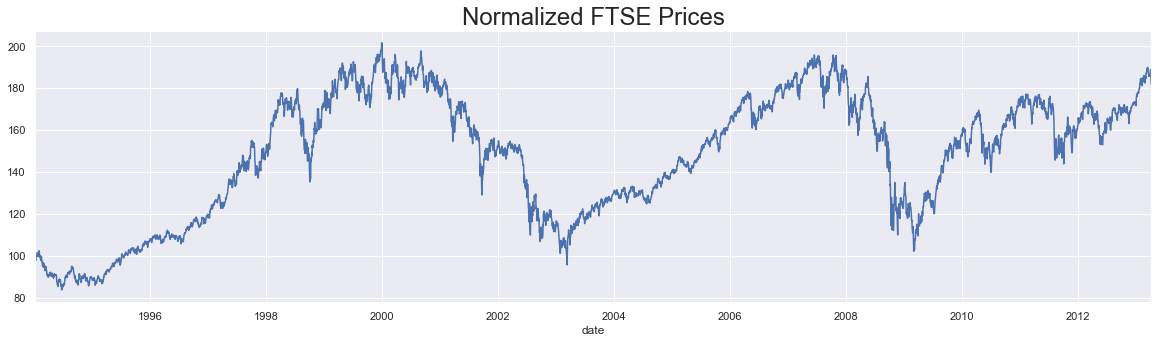

In [602]:
# Let's visualize the data
df.norm.plot(figsize=(20,5))
plt.title("Normalized FTSE Prices", size=24)
plt.show()

In [603]:
sts.adfuller(df.norm)

(-1.8928710132672337,
 0.3354222074330079,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [604]:
# Dickey-Fuller test suggest non-stationarity, as it failed to reject null hypothesis 

# Normalizing Returnsm

In [605]:
# Normalizing the values
# X_t --> % of X_1
# Y_t --> % of Y_1
# Means, convert all the values of series to the percentage of first value of series

# The magnitude of two series may be significantly different otherwise, and normalization converts the magnitude into
# the same scale for multiple series

In [606]:
# Firstly, SET SOME BENCHMARK
# Interpretation seems easiest, if we simply go with the value for the first period
benchmark_returns = df.returns.iloc[0]
df['norm_returns'] = df.returns.div(benchmark_returns).mul(100)

In [607]:
# We often rely on normalized returns

# They account for the absolute profitability of the investments in contrast to prices

# And, they allow us to compare the relative profitability as opposed to non-normalized returns

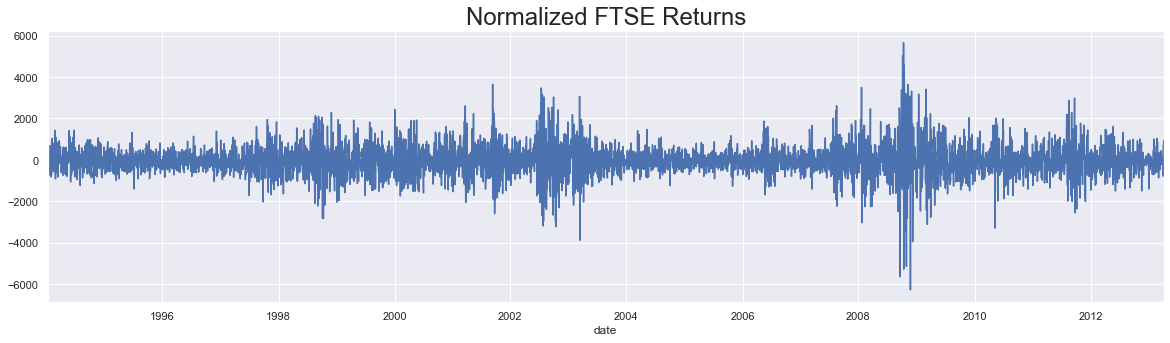

In [608]:
# Let's visualize the data
df.norm_returns.plot(figsize=(20,5))
plt.title("Normalized FTSE Returns", size=24)
plt.show()

In [609]:
sts.adfuller(df.norm_returns)

(-12.770265719497223,
 7.798058336038942e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

In [610]:
# Dickey-Fuller test suggest stationarity, as it rejects null hypothesis 

In [612]:
# Results obtained from Dickey-Fuller test are identical to those obtained from Non-normalized data of FTSE, which suggests
# the identical variability between two series, and reports no change between two series.

In [613]:
# So we can continue to work with Normalized data, as its as integral as non-normalized data

In [614]:
# Normalizing does not affect stationarity of data

# Normalized Returns: Fit the Model

In [615]:
# Fitting different lagged models for prices and non-normalized returns

# Exact same course of action for model selection

# Begin with simplest model, and keep on increasing the complexity

# AR(1);     AR(2);     AR(3);     AR(4);     And so

In [617]:
model_norm_returns_ar1 = ARMA(df.norm_returns, order=(1,0))
resuls_norm_returns_ar1 = model_norm_returns_ar1.fit()
resuls_norm_returns_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           norm_returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.743
Method:                       css-mle   S.D. of innovations            749.388
Date:                Tue, 14 Apr 2020   AIC                          80709.487
Time:                        14:41:08   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.9731     10.339     -1.158      0.247     -32.237       8.291
ar.L1.norm_returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

In [618]:
model_norm_returns_ar2 = ARMA(df.norm_returns, order=(2,0))
resuls_norm_returns_ar2 = model_norm_returns_ar2.fit()
resuls_norm_returns_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           norm_returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40345.450
Method:                       css-mle   S.D. of innovations            748.449
Date:                Tue, 14 Apr 2020   AIC                          80698.901
Time:                        14:41:30   BIC                          80724.985
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.9731      9.834     -1.218      0.223     -31.247       7.301
ar.L1.norm_returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.norm_returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

### >>> Try Applying LLR Test

In [622]:
print (f"Normalized FTSE Returns: Analyzing Cut-Off for Lags \n")
for i in range(1, 10):
    mxr1 = ARMA(df.norm_returns, order=(i,0))
    mxr2 = ARMA(df.norm_returns, order=(i+1,0))
    print (f" Lag_{i} vs Lag_{i+1}; Significance Level ({i+1} Lags) {LLR_test(mxr1, mxr2)}")

Normalized FTSE Returns: Analyzing Cut-Off for Lags 

 Lag_1 vs Lag_2; Significance Level (2 Lags) 0.0
 Lag_2 vs Lag_3; Significance Level (3 Lags) 0.0
 Lag_3 vs Lag_4; Significance Level (4 Lags) 0.001
 Lag_4 vs Lag_5; Significance Level (5 Lags) 0.0
 Lag_5 vs Lag_6; Significance Level (6 Lags) 0.001
 Lag_6 vs Lag_7; Significance Level (7 Lags) 0.44
 Lag_7 vs Lag_8; Significance Level (8 Lags) 0.148
 Lag_8 vs Lag_9; Significance Level (9 Lags) 0.885
 Lag_9 vs Lag_10; Significance Level (10 Lags) 0.515


In [623]:
# These results are identical to Non-normalized data,
# and proves there is no impact of Normalization on Model Selection 

In [624]:
# According to Dickey-FUller test, AR(6) is the best model to continue with

# Working with Non-Normalized Data
# Examining AR Model Residuals of FTSE Prices 

In [625]:
# Ideally, we perform following steps to examine the AR Model Residuals

# 1. Examine a summary of their statistics
# 2. Testing them for stationarity
# 3. Assumption: Ideally, the residual should follow a random walk process, so they should be stationary
# 4. Apply the Dicky-FUller test before plotting the values
# 5. Plotting the values

In [626]:
# Earlier we found, that

# AR(7) is the best model for "FTSE Prices"
# AR(6) is the best model for "FTSE Normalized values"

In [629]:
model_ar_7 = ARMA(df.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()
results_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -27586.899
Method:                       css-mle   S.D. of innovations             58.902
Date:                Tue, 14 Apr 2020   AIC                          55191.797
Time:                        14:51:04   BIC                          55250.488
Sample:                    01-10-1994   HQIC                         55212.363
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9691    590.465      8.620      0.000    3932.678    6247.260
ar.L1.market_value     0.9786      0.014     69.510      0.000       0.951       1.006
ar.L2.market_value    -0.0304      0.020     -1.540      0.124      -0.069       0.008
ar.L3.market_value    -0.0267      0.020     -1.353      0.176      -0.065       0.012
ar.L4.market_value     0.1039      0.020      5.279      0.000       0.065       0.142
ar.L5.market_value    -0.0668      0.020     -3.386      0.001      -0.105      -0.028
ar.L6.market_value    -0.0025      0.020     -0.127      0.899      -0.041       0.036
ar.L7.market_value     0.0427      0.014      3.025      0.003       0.015       0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2            1.3301           -0.9297j            1.6228           -0.0971
AR.3            1.3301           +0.9297j            1.6228            0.0971
AR.4           -0.0400           -1.5870j            1.5875           -0.2540
AR.5           -0.0400           +1.5870j            1.5875            0.2540
AR.6           -1.7613           -0.6516j            1.8780           -0.4436
AR.7           -1.7613           +0.6516j            1.8780            0.4436
-----------------------------------------------------------------------------
"""

In [632]:
df['residual_prices'] = results_ar_7.resid

In [633]:
df.residual_prices.mean()

0.3525543985483418

In [634]:
# Mean is close to zero, which indicates that our model performs well on average

In [635]:
df.residual_prices.var()

4010.484313696113

In [638]:
# High variance suggests that the Residuals are not concentrated around the mean of 0
# and spread all over the place

# This is because AR models perform poorly when predicting Non-stationary data

In [640]:
sts.adfuller(df.residual_prices)

(-75.96947270118,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.42177336164)

In [641]:
# This seems to resemble White Noise

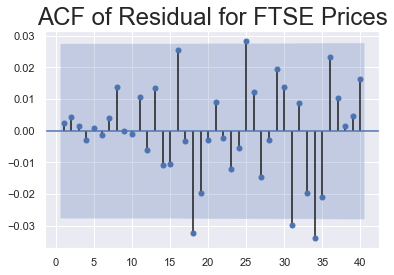

In [642]:
sgt.plot_acf(df.residual_prices, zero=False, lags=40)
plt.title("ACF of Residual for FTSE Prices", size=24)
plt.show()

In [643]:
# This Figure suggests that Residuals are not significantly different from Zero, as the non-singificance area suggests
# However, few random peaks are out of non-significance region lead us to believe that there's an even better predictor

# Working with Normalized Data
# Examining AR Model "Normalized" Residuals of FTSE Prices 

In [658]:
model_ar_6 = ARMA(df.returns, order=(6,0))
results_ar_6 = model_ar_6.fit()
results_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Tue, 14 Apr 2020   AIC                          15789.890
Time:                        15:05:49   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     -3.716      0.000      -0.080      -0.025
ar.L3.returns    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.returns     0.0424      0.014      3.009      0.003       0.015       0.070
ar.L5.returns    -0.0607      0.014     -4.309      0.000      -0.088      -0.033
ar.L6.returns    -0.0466      0.014     -3.302      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2869           -0.9022j            1.5716           -0.0973
AR.2            1.2869           +0.9022j            1.5716            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8659           -0.4836j            1.9275           -0.4596
AR.6           -1.8659           +0.4836j            1.9275            0.4596
-----------------------------------------------------------------------------
"""

In [661]:
df['norm_residual_returns'] = results_ar_6.resid

In [663]:
df.norm_residual_returns.mean()

-5.3728569435407e-05

In [664]:
df.norm_residual_returns.var()

1.3559802110690937

In [668]:
sts.adfuller(df.norm_residual_returns) 
# Confirms that data is stationary

(-70.78379938556968,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834326676)

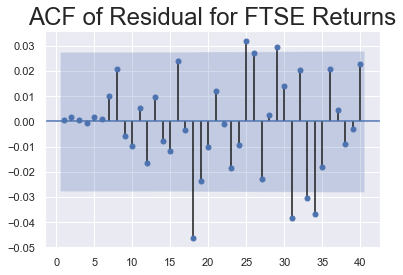

In [667]:
sgt.plot_acf(df.norm_residual_returns, zero=False, lags=40)
plt.title("ACF of Residual for FTSE Returns", size=24)
plt.show()

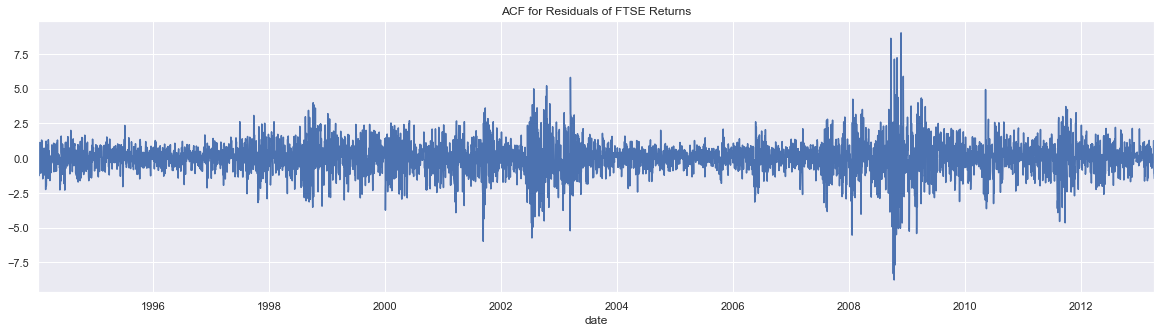

In [669]:
df.norm_residual_returns.plot(figsize=(20,5))
plt.title("ACF for Residuals of FTSE Returns")
plt.show()

# Simple Moving Average (MA) Model

In [672]:
# r_t = c + Theta_1 * E_t-1 + E_t

# r_t:          The values of "r" in the current period
# Theta_1 :     A numeric coefficient for the value associated with the 1st lag
# E_t:          Residuals for the current period
# E_t-1:        Residuals for past period

#### How to fit a Time-Series in Simple Moving Average Model

In [674]:
df_c2.head()

,market_value
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


In [676]:
df2 = df_c2[:size]
df2_test = df_c2[size:]

In [678]:
df2['returns'] = df2.market_value.pct_change().mul(100)

In [679]:
df2.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


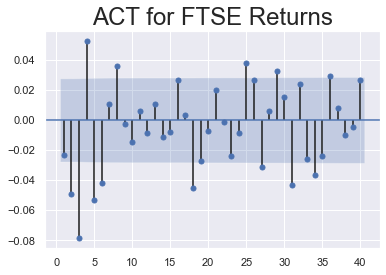

In [681]:
sgt.plot_acf(df.returns, lags=40, zero=False)
plt.title("ACT for FTSE Returns", size=24)
plt.show()

# Fitting Higher-Lag MA Models for Returns

In [682]:
model_returns_ma_1 = ARMA(df2.returns[1:], order=(0,1))
# Order = (P, Q)
# P: AR Components
# Q: MA Components

In [683]:
result_returns_ma_1 = model_returns_ma_1.fit()
result_returns_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 14 Apr 2020   AIC                          15865.190
Time:                        16:17:16   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.086      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

In [684]:
# So in this sub-section:

# Fit a higher-lag MA model
# MA(2), MA(3) or higher

# Analyze its coefficients and log-likelihood
# Repeat the same process several times

In [689]:
model_returns_ma_8 = ARMA(df2.returns[1:], order=(0,8))
result_returns_ma_8 = model_returns_ma_8.fit()
result_returns_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Tue, 14 Apr 2020   AIC                          15791.205
Time:                        16:30:33   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.returns    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.returns     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.returns    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.returns    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.returns     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.returns     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

In [700]:
print (f"FTSE Returns: Analyzing Cut-Off for Lags \n")
for i in range(1, 10):
    mxr1 = ARMA(df2.returns[1:], order=(0,i))
    mxr2 = ARMA(df2.returns[1:], order=(0, i+1))
    print (f" Lag_{i} vs Lag_{i+1}; Significance Level (P-value) ({i+1} Lags) {LLR_test(mxr1, mxr2)}")

FTSE Returns: Analyzing Cut-Off for Lags 

 Lag_1 vs Lag_2; Significance Level (P-value) (2 Lags) 0.0
 Lag_2 vs Lag_3; Significance Level (P-value) (3 Lags) 0.0
 Lag_3 vs Lag_4; Significance Level (P-value) (4 Lags) 0.001
 Lag_4 vs Lag_5; Significance Level (P-value) (5 Lags) 0.001
 Lag_5 vs Lag_6; Significance Level (P-value) (6 Lags) 0.007
 Lag_6 vs Lag_7; Significance Level (P-value) (7 Lags) 0.554
 Lag_7 vs Lag_8; Significance Level (P-value) (8 Lags) 0.009
 Lag_8 vs Lag_9; Significance Level (P-value) (9 Lags) 0.59
 Lag_9 vs Lag_10; Significance Level (P-value) (10 Lags) 0.483


In [701]:
# Let's analyze the fitness test between MA(6) and MA(8), because MA(7) isn't found significant.
# So, we're here looking to find the best model out of MA(7)-1 and MA(7)+1
# i.e. MA(6) and MA(8)
mxr1 = ARMA(df2.returns[1:], order=(0,6))
mxr2 = ARMA(df2.returns[1:], order=(0,8))
# Because it has difference of two levels, so Degree of Freedom should be set to 2
# Which is currently set to 1 (As Default)
print (f" Lag_6 vs Lag_8; Significance Level (P-value) (8 Lags) {LLR_test(mxr1, mxr2, DF=2)}")

 Lag_6 vs Lag_8; Significance Level (P-value) (8 Lags) 0.027


In [696]:
# Concludingly, MA(8) is a better model than MA(6)
# Alpha = 0.05 or 5%

# Examining the MA Models Residuals for Returns

In [702]:
# Extract the residuals of the Best model to dataframe
model_returns_ma_8 = ARMA(df2.returns[1:], order=(0,8))
results_returns_ma_8 = model_returns_ma_8.fit()
df2['residual_returns'] = results_returns_ma_8.resid[1:]

In [703]:
df2.head()

,market_value,returns,residual_returns
date,,,
1994-01-07,3445.98,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN
1994-01-11,3413.77,-0.779229,-0.802111
1994-01-12,3372.02,-1.222988,-1.269464
1994-01-13,3360.01,-0.356166,-0.464780


In [714]:
mean_val = round(df2.residual_returns.mean(), 3)
var_val = round(df2.residual_returns.var(), 3)
print (f"Mean of Residual of FTSE Returns: {mean_val} \nVariance of Residual of FTSE Returns: {var_val}\n") 

Mean of Residual of FTSE Returns: -0.0 
Variance of Residual of FTSE Returns: 1.356



In [717]:
import math
std = round(math.sqrt(df2.residual_returns.var()), 3)
print (f"Standard Deviation: {std}")

Standard Deviation: 1.164


In [716]:
# So How much data will lie between different standard deviations

# 68% between 1 standard deviations
# 95% between 2 standard deviations
# 99.7% between 3 standard deviations

In [721]:
# What's the range of 3 standard deviations from the mean?
# Simply, 3*std
print (f"Total 99.7% data may be covered between 3 standard deviations, which represent (+ and -) {3*std} limits\n")

Total 99.7% data may be covered between 3 standard deviations, which represent (+ and -) 3.492 limits



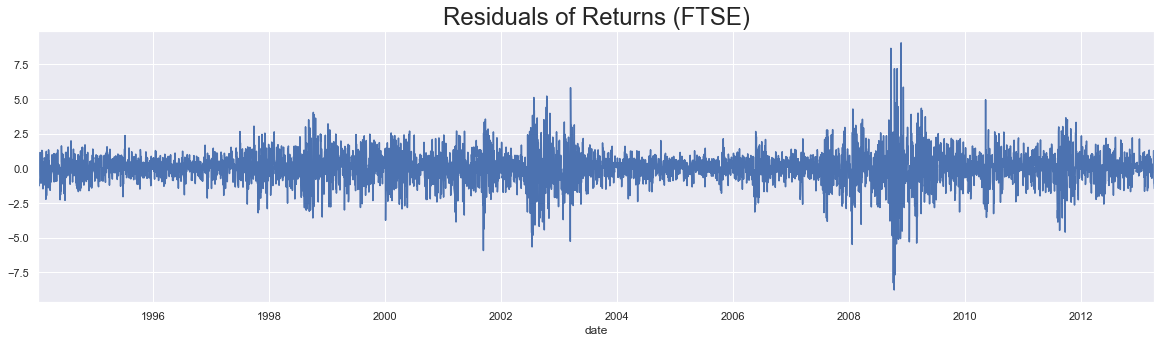

In [724]:
df2.residual_returns.plot(figsize=(20,5))
plt.title("Residuals of Returns (FTSE)", size=24)
plt.show()

In [727]:
sts.adfuller(df2.residual_returns[2:])

(-70.83581514064977,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052185099586)

In [728]:
# Dickey-Fuller test suggests that the data resembles White Noise.

# Still, ACF visualization is important to confirm the claim

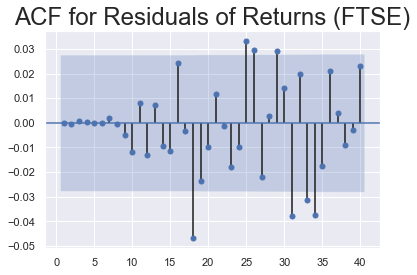

In [731]:
sgt.plot_acf(df2.residual_returns[2:], lags=40, zero=False)
plt.title("ACF for Residuals of Returns (FTSE)", size=24)
plt.show()

In [733]:
# Test the perofrmance of MA(6) model
model_returns_ma_6 = ARMA(df2.returns[1:], order=(0,6))
results_returns_ma_6 = model_returns_ma_6.fit()
res6 = results_returns_ma_6.resid[1:]

In [734]:
sts.adfuller(res6[2:])

(-70.84029398077658,
 0.0,
 0,
 5016,
 {'1%': -3.431654355990492,
  '5%': -2.862116384706994,
  '10%': -2.5670768102089263},
 15685.635627628357)

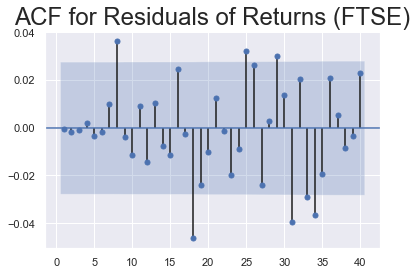

In [735]:
sgt.plot_acf(res6[2:], lags=40, zero=False)
plt.title("ACF for Residuals of Returns (FTSE)", size=24)
plt.show()

# Normalized Returns

### Model Selection for Normalized Returns

In [738]:
df2.head(4)

,market_value,returns,residual_returns
date,,,
1994-01-07,3445.98,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN
1994-01-11,3413.77,-0.779229,-0.802111
1994-01-12,3372.02,-1.222988,-1.269464


In [737]:
bench_returns = df2.returns[1] # Becaus location 0 is NaN value

In [742]:
df2['norml_returns'] = df2.returns.div(bench_returns).mul(100)

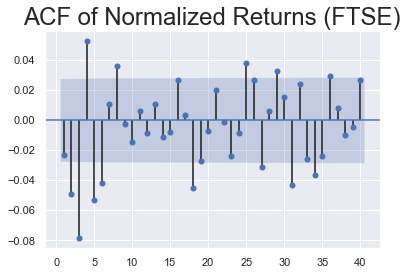

In [745]:
sgt.plot_acf(df2.norml_returns[1:], zero=False, lags=40)
plt.title("ACF of Normalized Returns (FTSE)", size=24)
plt.show()

In [746]:
# Test the perofrmance of MA(6) model
model_ret_ma_6 = ARMA(df2.norml_returns[1:], order=(0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
results_ret_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          norml_returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood              -40311.216
Method:                       css-mle   S.D. of innovations            743.358
Date:                Tue, 14 Apr 2020   AIC                          80638.431
Time:                        18:53:39   BIC                          80690.601
Sample:                    01-10-1994   HQIC                         80656.712
                         - 04-05-2013                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -11.9731      8.442     -1.418      0.156     -28.519       4.572
ma.L1.norml_returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.norml_returns    -0.0486      0.014     -3.436      0.001      -0.076      -0.021
ma.L3.norml_returns    -0.0827      0.014     -5.846      0.000      -0.110      -0.055
ma.L4.norml_returns     0.0466      0.014      3.434      0.001       0.020       0.073
ma.L5.norml_returns    -0.0484      0.014     -3.371      0.001      -0.077      -0.020
ma.L6.norml_returns    -0.0387      0.014     -2.682      0.007      -0.067      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5011           -0.0000j            1.5011           -0.0000
MA.2            0.8248           -1.4775j            1.6921           -0.1690
MA.3            0.8248           +1.4775j            1.6921            0.1690
MA.4           -1.0066           -1.2260j            1.5863           -0.3594
MA.5           -1.0066           +1.2260j            1.5863            0.3594
MA.6           -2.3891           -0.0000j            2.3891           -0.5000
-----------------------------------------------------------------------------
"""

In [747]:
# Test the perofrmance of MA(6) model
model_ret_ma_8 = ARMA(df2.norml_returns[1:], order=(0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
results_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          norml_returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Tue, 14 Apr 2020   AIC                          80635.194
Time:                        18:53:44   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -11.9731      8.846     -1.354      0.176     -29.310       5.364
ma.L1.norml_returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.norml_returns    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.norml_returns    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.norml_returns     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.norml_returns    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.norml_returns    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.norml_returns     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.norml_returns     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

In [753]:
mrma1 = ARMA(df2.norml_returns[1:], order=(0,6))
mrma2 = ARMA(df2.norml_returns[1:], order=(0,8))
print (f" 6 Lags vs 8 Lags; Significance Level (P-value) (8 Lags) {LLR_test(mrma1, mrma2, DF=2)}")

 6 Lags vs 8 Lags; Significance Level (P-value) (8 Lags) 0.027


Text(0.5, 1.0, 'MA(8) Residuals of Return')

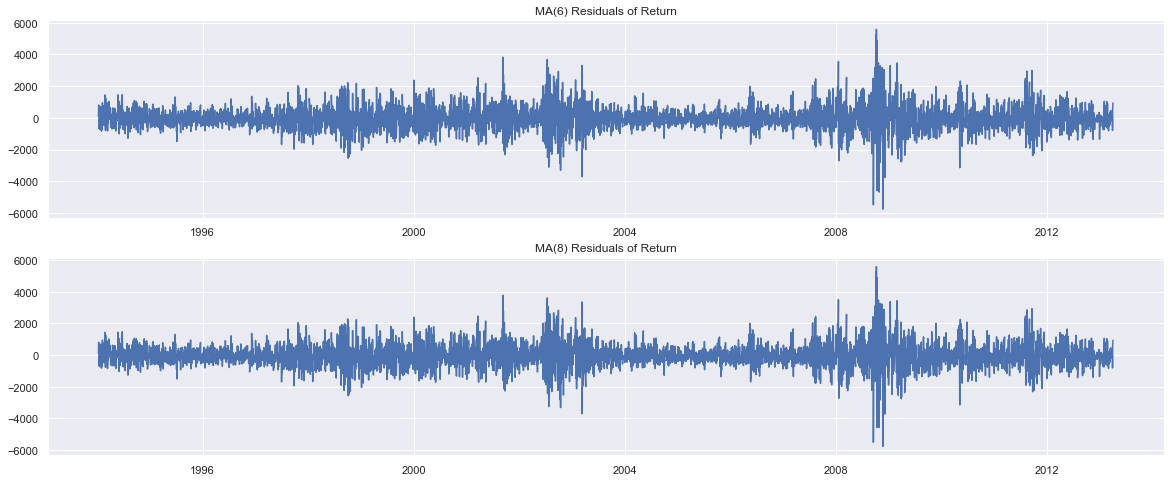

In [769]:
mrma1 = ARMA(df2.norml_returns[1:], order=(0,6))
rr1 = mrma1.fit()
mrma2 = ARMA(df2.norml_returns[1:], order=(0,8))
rr2 = mrma2.fit()
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.plot(rr1.resid, label="MA(6)")
plt.title("MA(6) Residuals of Return")
plt.subplot(2,1,2)
plt.plot(rr2.resid, label="MA(8)")
plt.title("MA(8) Residuals of Return")

# MA Models for Prices

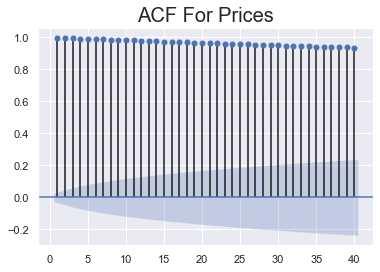

In [770]:
sgt.plot_acf(df2.market_value, zero = False, lags = 40)
plt.title("ACF For Prices", size = 20)
plt.show()

In [771]:
model_ma_1 = ARMA(df2.market_value, order=(0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -38629.000
Method:                       css-mle   S.D. of innovations            530.756
Date:                Tue, 14 Apr 2020   AIC                          77264.000
Time:                        19:55:05   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6029     14.660    347.187      0.000    5060.871    5118.335
ma.L1.market_value     0.9573      0.003    335.560      0.000       0.952       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0446           +0.0000j            1.0446            0.5000
-----------------------------------------------------------------------------
"""

In [774]:
model_ma_2 = ARMA(df2.market_value, order=(0,2))
results_ma_2 = model_ma_2.fit()
results_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 2)   Log Likelihood              -36017.000
Method:                       css-mle   S.D. of innovations            315.424
Date:                Tue, 14 Apr 2020   AIC                          72041.999
Time:                        20:00:11   BIC                          72068.085
Sample:                    01-07-1994   HQIC                         72051.140
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.3739     15.472    328.951      0.000    5059.050    5119.698
ma.L1.market_value     1.6060      0.008    200.067      0.000       1.590       1.622
ma.L2.market_value     0.8703      0.005    164.555      0.000       0.860       0.881
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9226           -0.5457j            1.0719           -0.4150
MA.2           -0.9226           +0.5457j            1.0719            0.4150
-----------------------------------------------------------------------------
"""

In [779]:
model_ma_4 = ARMA(df2.market_value, order=(0,4))
results_ma_4 = model_ma_4.fit()
results_ma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 4)   Log Likelihood              -32885.361
Method:                       css-mle   S.D. of innovations            169.031
Date:                Tue, 14 Apr 2020   AIC                          65782.722
Time:                        20:01:16   BIC                          65821.850
Sample:                    01-07-1994   HQIC                         65796.433
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.5015     18.097    281.239      0.000    5054.033    5124.970
ma.L1.market_value     1.9961      0.013    152.234      0.000       1.970       2.022
ma.L2.market_value     2.3183      0.019    121.798      0.000       2.281       2.356
ma.L3.market_value     1.6391      0.015    109.625      0.000       1.610       1.668
ma.L4.market_value     0.6355      0.009     68.306      0.000       0.617       0.654
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.2816           -1.0529j            1.0899           -0.2916
MA.2           -0.2816           +1.0529j            1.0899            0.2916
MA.3           -1.0080           -0.5555j            1.1509           -0.4198
MA.4           -1.0080           +0.5555j            1.1509            0.4198
-----------------------------------------------------------------------------
"""

# The ARMA Model 

### Auto-Regressive Moving Average Model

In [781]:
model_ma_arma_1 = ARMA(df2.returns[1:], order=(1,1))
results_ma_arma_1 = model_ma_arma_1.fit()
results_ma_arma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Tue, 14 Apr 2020   AIC                          15841.000
Time:                        20:10:34   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

In [782]:
model_ma_arma_2 = ARMA(df2.returns[1:], order=(2,2))
results_ma_arma_2 = model_ma_arma_2.fit()
results_ma_arma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 2)   Log Likelihood               -7913.223
Method:                       css-mle   S.D. of innovations              1.170
Date:                Tue, 14 Apr 2020   AIC                          15838.446
Time:                        20:11:03   BIC                          15877.573
Sample:                    01-10-1994   HQIC                         15852.156
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.394      0.163      -0.008       0.045
ar.L1.returns     0.7820      0.238      3.284      0.001       0.315       1.249
ar.L2.returns    -0.1563      0.177     -0.884      0.377      -0.503       0.190
ma.L1.returns    -0.8105      0.239     -3.388      0.001      -1.279      -0.342
ma.L2.returns     0.1177      0.187      0.628      0.530      -0.250       0.485
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5017           -0.3738j            2.5295           -0.0236
AR.2            2.5017           +0.3738j            2.5295            0.0236
MA.1            1.6107           +0.0000j            1.6107            0.0000
MA.2            5.2740           +0.0000j            5.2740            0.0000
-----------------------------------------------------------------------------
"""

In [792]:
modarma_1 = ARMA(df2.returns[1:], order=(1,1))
modar_1 = ARMA(df2.returns[1:], order=(1,0))
print (f"ARMA vs AR: {LLR_test(modar_1, modarma_1)}")

ARMA vs AR: 0.0


In [794]:
modarma_1 = ARMA(df2.returns[1:], order=(1,1))
modma_1 = ARMA(df2.returns[1:], order=(0,1))
print (f"ARMA vs MA: {LLR_test(modma_1, modarma_1)}")

ARMA vs MA: 0.0


In [820]:
?ARMA


In [824]:
sts.adfuller(df2.returns[1:]) # Suggested Non-stationary data

(-12.770265719497228,
 7.798058336038662e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

In [829]:
model_ma_arma_1 = ARMA(df2.returns[1:], order=(1,1))
results_ma_arma_1 = model_ma_arma_1.fit()
results_ma_arma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Tue, 14 Apr 2020   AIC                          15841.000
Time:                        22:01:58   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

# Higher Lag ARMA Model

In [795]:
# Check for following

# All coefficients significant
# High Log-Likelihood
# Low information criteria

# Approximate the data set too well

In [797]:
print (f"AR(x):-->  FTSE Returns: Analyzing Cut-Off for Lags \n")
for i in range(1, 10):
    mxr1 = ARMA(df2.returns[1:], order=(i, 0))
    mxr2 = ARMA(df2.returns[1:], order=(i+1, 0))
    print (f" Lag_{i} vs Lag_{i+1}; Significance Level (P-value) ({i+1} Lags) {LLR_test(mxr1, mxr2)}")

AR(x):-->  FTSE Returns: Analyzing Cut-Off for Lags 

 Lag_1 vs Lag_2; Significance Level (P-value) (2 Lags) 0.0
 Lag_2 vs Lag_3; Significance Level (P-value) (3 Lags) 0.0
 Lag_3 vs Lag_4; Significance Level (P-value) (4 Lags) 0.001
 Lag_4 vs Lag_5; Significance Level (P-value) (5 Lags) 0.0
 Lag_5 vs Lag_6; Significance Level (P-value) (6 Lags) 0.001
 Lag_6 vs Lag_7; Significance Level (P-value) (7 Lags) 0.44
 Lag_7 vs Lag_8; Significance Level (P-value) (8 Lags) 0.148
 Lag_8 vs Lag_9; Significance Level (P-value) (9 Lags) 0.885
 Lag_9 vs Lag_10; Significance Level (P-value) (10 Lags) 0.515


In [796]:
print (f"MA(x):-->  FTSE Returns: Analyzing Cut-Off for Lags \n")
for i in range(1, 10):
    mxr1 = ARMA(df2.returns[1:], order=(0,i))
    mxr2 = ARMA(df2.returns[1:], order=(0, i+1))
    print (f" Lag_{i} vs Lag_{i+1}; Significance Level (P-value) ({i+1} Lags) {LLR_test(mxr1, mxr2)}")

MA(x):-->  FTSE Returns: Analyzing Cut-Off for Lags 

 Lag_1 vs Lag_2; Significance Level (P-value) (2 Lags) 0.0
 Lag_2 vs Lag_3; Significance Level (P-value) (3 Lags) 0.0
 Lag_3 vs Lag_4; Significance Level (P-value) (4 Lags) 0.001
 Lag_4 vs Lag_5; Significance Level (P-value) (5 Lags) 0.001
 Lag_5 vs Lag_6; Significance Level (P-value) (6 Lags) 0.007
 Lag_6 vs Lag_7; Significance Level (P-value) (7 Lags) 0.554
 Lag_7 vs Lag_8; Significance Level (P-value) (8 Lags) 0.009
 Lag_8 vs Lag_9; Significance Level (P-value) (9 Lags) 0.59
 Lag_9 vs Lag_10; Significance Level (P-value) (10 Lags) 0.483


In [ ]:
# From past, we learnt that AR(8) and MA(6)
# But it may produce too complicated model, 
# But its good practie to start from a simple model
# Which means starting from AR(3) and MA(3) may be a better option.

In [832]:
# AR(3), MA(3)
model_ar3ma3 = ARMA(df2.returns[1:], order=(3,3))
results_ar3ma3 = model_ar3ma3.fit()
results_ar3ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 14 Apr 2020   AIC                          15803.030
Time:                        22:03:47   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     -3.389      0.001      -0.464      -0.124
ar.L3.returns     0.4459      0.138      3.225      0.001       0.175       0.717
ma.L1.returns     0.1707      0.099      1.726      0.084      -0.023       0.365
ma.L2.returns     0.2277      0.084      2.701      0.007       0.062       0.393
ma.L3.returns    -0.5432      0.127     -4.270      0.000      -0.793      -0.294
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5168           -1.0283j            1.1508           -0.3241
AR.2           -0.5168           +1.0283j            1.1508            0.3241
AR.3            1.6932           -0.0000j            1.6932           -0.0000
MA.1           -0.5286           -0.9835j            1.1166           -0.3285
MA.2           -0.5286           +0.9835j            1.1166            0.3285
MA.3            1.4764           -0.0000j            1.4764           -0.0000
-----------------------------------------------------------------------------
"""

In [837]:
#Let's Find if ARMA(3,3) is better than ARMA(1,1) or not
# If ARMA(3,3) is better than ARMA(1,1)
# then, the best model lies somewhere between these two

In [843]:
model_ar1ma1 = ARMA(df2.returns[1:], order=(1,1))
model_ar3ma3 = ARMA(df2.returns[1:], order=(3,3))
print (f"ARMA(1,1) vs ARMA(3,3) :--> (P-value: {LLR_test(model_ar1ma1, model_ar3ma3)})")

ARMA(1,1) vs ARMA(3,3) :--> (P-value: 0.0)


In [838]:
# AR(3), MA(2)
model_ar3ma2 = ARMA(df2.returns[1:], order=(3,2))
results_ar3ma2 = model_ar3ma2.fit()
results_ar3ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 2)   Log Likelihood               -7895.747
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 14 Apr 2020   AIC                          15805.495
Time:                        22:10:33   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.251      0.211      -0.011       0.048
ar.L1.returns    -0.6785      0.087     -7.799      0.000      -0.849      -0.508
ar.L2.returns    -0.5088      0.139     -3.670      0.000      -0.780      -0.237
ar.L3.returns    -0.1141      0.015     -7.655      0.000      -0.143      -0.085
ma.L1.returns     0.6568      0.087      7.536      0.000       0.486       0.828
ma.L2.returns     0.4474      0.141      3.175      0.002       0.171       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4929           -1.5100j            1.5884           -0.3002
AR.2           -0.4929           +1.5100j            1.5884            0.3002
AR.3           -3.4749           -0.0000j            3.4749           -0.5000
MA.1           -0.7340           -1.3025j            1.4951           -0.3317
MA.2           -0.7340           +1.3025j            1.4951            0.3317
-----------------------------------------------------------------------------
"""

In [839]:
# AR(2), MA(3)
model_ar2ma3 = ARMA(df2.returns[1:], order=(2,3))
results_ar2ma3 = model_ar2ma3.fit()
results_ar2ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 3)   Log Likelihood               -7895.587
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 14 Apr 2020   AIC                          15805.174
Time:                        22:10:52   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.276      0.202      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.245      0.000      -0.736      -0.385
ar.L2.returns    -0.4187      0.193     -2.172      0.030      -0.796      -0.041
ma.L1.returns     0.5378      0.090      6.000      0.000       0.362       0.714
ma.L2.returns     0.3540      0.195      1.818      0.069      -0.028       0.736
ma.L3.returns    -0.1158      0.016     -7.369      0.000      -0.147      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6694           -1.3930j            1.5455           -0.3213
AR.2           -0.6694           +1.3930j            1.5455            0.3213
MA.1           -0.7270           -1.1772j            1.3836           -0.3381
MA.2           -0.7270           +1.1772j            1.3836            0.3381
MA.3            4.5097           -0.0000j            4.5097           -0.0000
-----------------------------------------------------------------------------
"""

In [845]:
print (f"ARMA(x,y) vs ARMA(3,3)   [x <= 3, y <= 3]")
for i in range(1, 4):
    for j in range(1, 4):
        mxr1 = ARMA(df2.returns[1:], order=(i, j))
        mxr2 = ARMA(df2.returns[1:], order=(3,3))
        print (f" ARMA({i},{j}) vs ARMA(3,3) :-->  {LLR_test(mxr1, mxr2)}")

ARMA(x,y) vs ARMA(3,3)   [x <= 3, y <= 3]
 ARMA(1,1) vs ARMA(3,3) :-->  0.0
 ARMA(1,2) vs ARMA(3,3) :-->  0.0
 ARMA(1,3) vs ARMA(3,3) :-->  0.01
 ARMA(2,1) vs ARMA(3,3) :-->  0.0
 ARMA(2,2) vs ARMA(3,3) :-->  0.0
 ARMA(2,3) vs ARMA(3,3) :-->  0.042
 ARMA(3,1) vs ARMA(3,3) :-->  0.001
 ARMA(3,2) vs ARMA(3,3) :-->  0.035
 ARMA(3,3) vs ARMA(3,3) :-->  1.0


In [847]:
mxr1 = ARMA(df2.returns[1:], order=(3, 1))
mxr2 = ARMA(df2.returns[1:], order=(3, 2))
print (f" ARMA(3,1) vs ARMA(3,2) :-->  {LLR_test(mxr1, mxr2)}")

 ARMA(3,1) vs ARMA(3,2) :-->  0.01


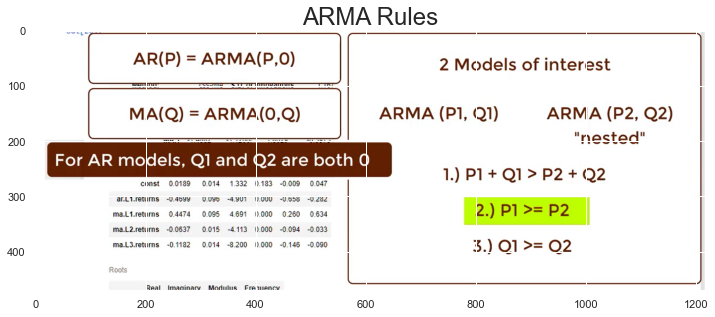

In [854]:
import cv2
# Load an color image in grayscale
img = cv2.imread('ARMA_Models_of_Interest.png')
# The important part - Correct BGR to RGB channel
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.title('ARMA Rules', size=24)
plt.show()

In [856]:
mxr1 = ARMA(df2.returns[1:], order=(3, 1))
res_mxr1 = mxr1.fit()
mxr2 = ARMA(df2.returns[1:], order=(3, 2))
res_mxr2 = mxr2.fit()
print (f" ARMA(3,1) LLR: {res_mxr1.llf}, AIC: {res_mxr1.aic}")
print (f" ARMA(3,2) LLR: {res_mxr2.llf}, AIC: {res_mxr2.aic}")


 ARMA(3,1) LLR: -7899.072139794182, AIC: 15810.144279588363
 ARMA(3,2) LLR: -7895.74745851499, AIC: 15805.49491702998


In [857]:
# Both LLR and AIC are smaller for ARMA(3,2) in comparison with ARMA(3,1).
# So ARMA(3,2) should be preferred in this situation

# Residuals for Returns 

In [858]:
mxr2 = ARMA(df2.returns[1:], order=(3, 2))
res_mxr2 = mxr2.fit()
df2['residual_return_ar3ma2'] = res_mxr2.resid[1:]

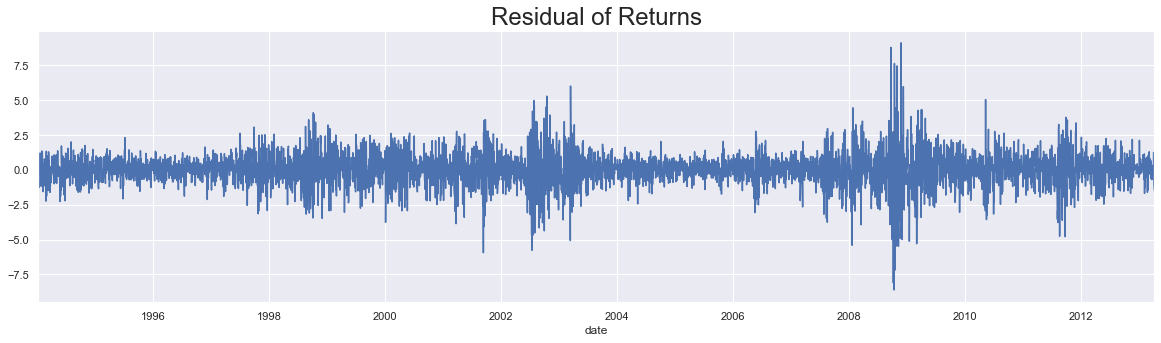

In [859]:
df2.residual_return_ar3ma2.plot(figsize=(20,5))
plt.title("Residual of Returns", size=24)
plt.show()

In [860]:
# This suggests "The volatality in returns might not be fully comprehendable if we use only ARMA models"

In [865]:
df2.head()

,market_value,returns,residual_returns,norml_returns,residual_return_ar3ma2
date,,,,,
1994-01-07,3445.98,NaN,NaN,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN,100.000000,NaN
1994-01-11,3413.77,-0.779229,-0.802111,497.260711,-0.802111
1994-01-12,3372.02,-1.222988,-1.269464,780.443046,-1.269912
1994-01-13,3360.01,-0.356166,-0.464780,227.285567,-0.463250


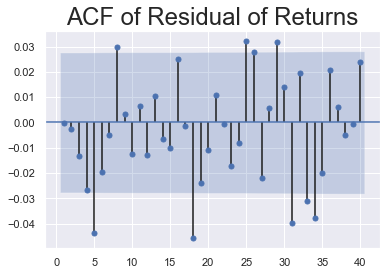

In [866]:
# Plot ACF
sgt.plot_acf(df2.residual_return_ar3ma2[2:], zero=False, lags=40)
plt.title("ACF of Residual of Returns", size=24)
plt.show()

In [867]:
# AR(3), MA(2)
model_ar5ma5 = ARMA(df2.returns[1:], order=(5,5))
results_ar5ma5 = model_ar5ma5.fit()
results_ar5ma5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Tue, 14 Apr 2020   AIC                          15788.321
Time:                        23:06:07   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.returns    -0.6722      0.146     -4.603      0.000      -0.958      -0.386
ar.L3.returns    -0.1152      0.141     -0.817      0.414      -0.392       0.161
ar.L4.returns     0.1779      0.129      1.381      0.167      -0.075       0.430
ar.L5.returns     0.1215      0.107      1.132      0.258      -0.089       0.332
ma.L1.returns     0.0443      0.138      0.322      0.748      -0.226       0.314
ma.L2.returns     0.6223      0.144      4.321      0.000       0.340       0.905
ma.L3.returns     0.0107      0.136      0.079      0.937      -0.256       0.277
ma.L4.returns    -0.1753      0.122     -1.436      0.151      -0.415       0.064
ma.L5.returns    -0.2240      0.104     -2.148      0.032      -0.428      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0870           -1.0364j            1.0401           -0.2367
AR.2            0.0870           +1.0364j            1.0401            0.2367
AR.3            1.7715           -0.0000j            1.7715           -0.0000
AR.4           -1.7050           -1.1784j            2.0726           -0.4038
AR.5           -1.7050           +1.1784j            2.0726            0.4038
MA.1            0.1033           -1.0434j            1.0485           -0.2343
MA.2            0.1033           +1.0434j            1.0485            0.2343
MA.3            1.4855           -0.0000j            1.4855           -0.0000
MA.4           -1.2373           -1.0965j            1.6533           -0.3846
MA.5           -1.2373           +1.0965j            1.6533            0.3846
-----------------------------------------------------------------------------
"""

In [868]:
# In ARMA(5,5) most of coefficients are not-significant, which means going in lower order may find us a better solution
# Lets Try with (5,1) and (1,5)

In [870]:
mxr1 = ARMA(df2.returns[1:], order=(5, 1))
res_mxr1 = mxr1.fit()
mxr2 = ARMA(df2.returns[1:], order=(1, 5))
res_mxr2 = mxr2.fit()
print (f" ARMA(5,1) \tLLR: {res_mxr1.llf} \tAIC: {res_mxr1.aic}")
print (f" ARMA(1,5) \tLLR: {res_mxr2.llf} \tAIC: {res_mxr2.aic}")

 ARMA(5,1) 	LLR: -7889.3112829470565 	AIC: 15794.622565894113
 ARMA(1,5) 	LLR: -7890.973460209709 	AIC: 15797.946920419417


In [871]:
# From above insights, the ARMA(5,1) is a good fit model than ARMA(1,5)

In [873]:
# Now let's compare (5,1) against our previous best (3,2)
mxr1 = ARMA(df2.returns[1:], order=(5, 1))
res_mxr1 = mxr1.fit()
mxr2 = ARMA(df2.returns[1:], order=(3, 2))
res_mxr2 = mxr2.fit()
print (f" ARMA(5,1) \tLLR: {round(res_mxr1.llf,5)} \tAIC: {res_mxr1.aic}")
print (f" ARMA(3,2) \tLLR: {round(res_mxr2.llf,5)} \tAIC: {res_mxr2.aic}")

 ARMA(5,1) 	LLR: -7889.31128 	AIC: 15794.622565894113
 ARMA(3,2) 	LLR: -7895.74746 	AIC: 15805.49491702998


In [874]:
# ARMA(5,1) is better than ARMA(3,2) as suggested by the above insight.

In [878]:
mxr1 = ARMA(df2.returns[1:], order=(5, 1))
res_mxr1 = mxr1.fit()
df2['residual_return_ar5ma1'] = res_mxr1.resid

In [886]:
mxar6 = ARMA(df2.returns[1:], order=(6, 0))
res_mxar6 = mxar6.fit()
df2['residual_return_ar6'] = res_mxar6.resid

In [887]:
df2.head()

,market_value,returns,residual_returns,norml_returns,residual_return_ar3ma2,residual_return_ar5ma1,residual_return_ar6
date,,,,,,,
1994-01-07,3445.98,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN,100.000000,NaN,-0.175617,-0.175623
1994-01-11,3413.77,-0.779229,-0.802111,497.260711,-0.802111,-0.802191,-0.802198
1994-01-12,3372.02,-1.222988,-1.269464,780.443046,-1.269912,-1.270020,-1.270028
1994-01-13,3360.01,-0.356166,-0.464780,227.285567,-0.463250,-0.466056,-0.466065


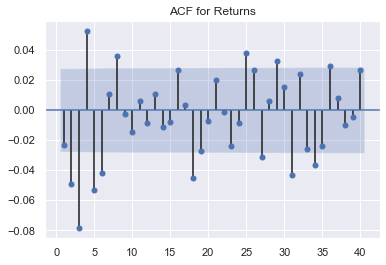

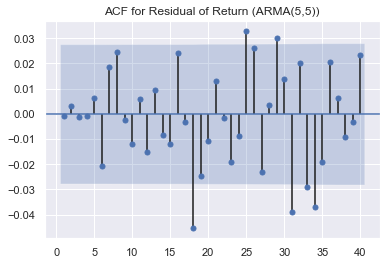

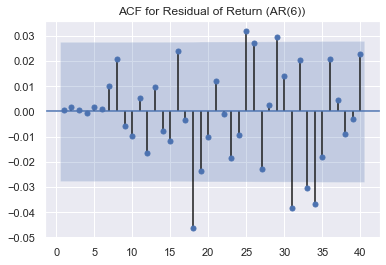

In [888]:
sgt.plot_acf(df2.returns[1:], zero=False, lags=40, title="ACF for Returns")
sgt.plot_acf(df2.residual_return_ar5ma1[1:], zero=False, lags=40, title="ACF for Residual of Return (ARMA(5,5))")
sgt.plot_acf(df2.residual_return_ar6[1:], zero=False, lags=40, title="ACF for Residual of Return (AR(6))")
plt.show()

# ARMA Models for Prices

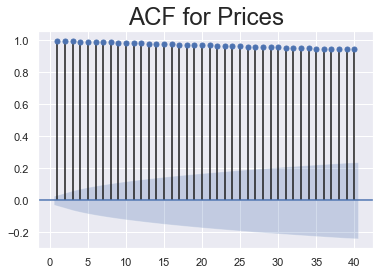

In [894]:
sgt.plot_acf(df2.market_value, unbiased=True, zero=False, lags=40)
plt.title("ACF for Prices", size=24)
plt.show()

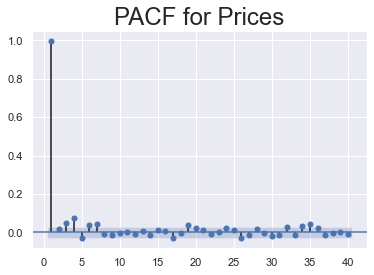

In [895]:
sgt.plot_pacf(df2.market_value, zero=False, lags=40, method=('ols'))
plt.title("PACF for Prices", size=24)
plt.show()

In [899]:
model_ar1ma1 = ARMA(df2.market_value, order=(1,1))
result_ar1ma1 = model_ar1ma1.fit()
df2['residual_ar1ma1'] = result_ar1ma1.resid
result_ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 1)   Log Likelihood              -27621.789
Method:                       css-mle   S.D. of innovations             59.248
Date:                Tue, 14 Apr 2020   AIC                          55251.579
Time:                        23:38:42   BIC                          55277.664
Sample:                    01-07-1994   HQIC                         55260.719
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    496.754     10.246      0.000    4116.022    6063.260
ar.L1.market_value     0.9985      0.001   1323.182      0.000       0.997       1.000
ma.L1.market_value    -0.0190      0.015     -1.274      0.203      -0.048       0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1           52.5198           +0.0000j           52.5198            0.0000
-----------------------------------------------------------------------------
"""

In [900]:
df2.head()

,market_value,returns,residual_returns,norml_returns,residual_return_ar3ma2,residual_return_ar5ma1,residual_return_ar6,residual_ar1ma1
date,,,,,,,,
1994-01-07,3445.98,NaN,NaN,NaN,NaN,NaN,NaN,-1643.661076
1994-01-10,3440.58,-0.156704,NaN,100.000000,NaN,-0.175617,-0.175623,-7.905823
1994-01-11,3413.77,-0.779229,-0.802111,497.260711,-0.802111,-0.802191,-0.802198,-29.378902
1994-01-12,3372.02,-1.222988,-1.269464,780.443046,-1.269912,-1.270020,-1.270028,-44.767131
1994-01-13,3360.01,-0.356166,-0.464780,227.285567,-0.463250,-0.466056,-0.466065,-15.381358


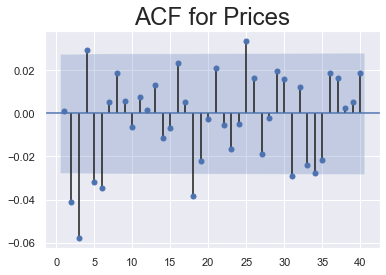

In [902]:
sgt.plot_acf(df2.residual_ar1ma1, zero=False, lags=40)
plt.title("ACF for Prices", size=24)
plt.show()

In [904]:
model_ar6ma6 = ARMA(df2.market_value, order=(6,6))
result_ar6ma6 = model_ar6ma6.fit(start_ar_lags = 11)
#df2['residual_ar1ma1'] = result_ar1ma1.resid
result_ar6ma6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 6)   Log Likelihood              -27587.932
Method:                       css-mle   S.D. of innovations             58.849
Date:                Tue, 14 Apr 2020   AIC                          55203.864
Time:                        23:41:33   BIC                          55295.164
Sample:                    01-07-1994   HQIC                         55235.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6490    568.688      8.950      0.000    3975.041    6204.257
ar.L1.market_value     1.9279      0.032     60.164      0.000       1.865       1.991
ar.L2.market_value    -1.7363      0.040    -43.539      0.000      -1.814      -1.658
ar.L3.market_value     1.2679      0.034     36.919      0.000       1.201       1.335
ar.L4.market_value    -0.2376      0.159     -1.496      0.135      -0.549       0.074
ar.L5.market_value    -0.4063      0.166     -2.448      0.014      -0.732      -0.081
ar.L6.market_value     0.1841      0.049      3.779      0.000       0.089       0.280
ma.L1.market_value    -0.9490      0.035    -27.136      0.000      -1.018      -0.880
ma.L2.market_value     0.7800      0.032     24.224      0.000       0.717       0.843
ma.L3.market_value    -0.5086      0.031    -16.360      0.000      -0.570      -0.448
ma.L4.market_value    -0.1561      0.160     -0.978      0.328      -0.469       0.157
ma.L5.market_value     0.0953      0.057      1.684      0.092      -0.016       0.206
ma.L6.market_value     0.0670      0.024      2.795      0.005       0.020       0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0857           -1.0503j            1.0537           -0.2370
AR.2            0.0857           +1.0503j            1.0537            0.2370
AR.3           -2.0255           -0.0000j            2.0255           -0.5000
AR.4            1.0011           -0.0000j            1.0011           -0.0000
AR.5            1.5302           -0.2669j            1.5534           -0.0275
AR.6            1.5302           +0.2669j            1.5534            0.0275
MA.1            0.1028           -1.0612j            1.0662           -0.2346
MA.2            0.1028           +1.0612j            1.0662            0.2346
MA.3            1.3620           -0.2794j            1.3904           -0.0322
MA.4            1.3620           +0.2794j            1.3904            0.0322
MA.5           -2.1759           -1.4336j            2.6057           -0.4073
MA.6           -2.1759           +1.4336j            2.6057            0.4073
-----------------------------------------------------------------------------
"""

In [906]:
model_ar5ma6 = ARMA(df2.market_value, order=(5,6))
result_ar5ma6 = model_ar5ma6.fit(start_ar_lags = 7)
#df2['residual_ar1ma1'] = result_ar1ma1.resid
result_ar5ma6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 6)   Log Likelihood              -27587.863
Method:                       css-mle   S.D. of innovations             58.849
Date:                Tue, 14 Apr 2020   AIC                          55201.726
Time:                        23:43:40   BIC                          55286.504
Sample:                    01-07-1994   HQIC                         55231.433
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6472    580.959      8.761      0.000    3950.989    6228.305
ar.L1.market_value     1.3584      0.178      7.651      0.000       1.010       1.706
ar.L2.market_value    -1.1289      0.237     -4.757      0.000      -1.594      -0.664
ar.L3.market_value     0.9147      0.229      3.998      0.000       0.466       1.363
ar.L4.market_value     0.0159      0.204      0.078      0.938      -0.384       0.415
ar.L5.market_value    -0.1613      0.119     -1.352      0.176      -0.395       0.073
ma.L1.market_value    -0.3796      0.178     -2.132      0.033      -0.729      -0.031
ma.L2.market_value     0.7294      0.125      5.827      0.000       0.484       0.975
ma.L3.market_value    -0.2198      0.153     -1.437      0.151      -0.520       0.080
ma.L4.market_value    -0.1387      0.114     -1.215      0.224      -0.362       0.085
ma.L5.market_value    -0.0879      0.017     -5.325      0.000      -0.120      -0.056
ma.L6.market_value     0.0265      0.024      1.128      0.259      -0.020       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0917           -1.0418j            1.0458           -0.2360
AR.2            0.0917           +1.0418j            1.0458            0.2360
AR.3            1.0010           -0.0000j            1.0010           -0.0000
AR.4            1.8979           -0.0000j            1.8979           -0.0000
AR.5           -2.9838           -0.0000j            2.9838           -0.5000
MA.1            0.1071           -1.0487j            1.0542           -0.2338
MA.2            0.1071           +1.0487j            1.0542            0.2338
MA.3           -1.5353           -1.5156j            2.1574           -0.3760
MA.4           -1.5353           +1.5156j            2.1574            0.3760
MA.5            1.5918           -0.0000j            1.5918           -0.0000
MA.6            4.5783           -0.0000j            4.5783           -0.0000
-----------------------------------------------------------------------------
"""

In [913]:
mxr1 = ARMA(df2.market_value, order=(5, 6))
res_mxr1 = mxr1.fit(start_ar_lags=7)
mxr2 = ARMA(df2.market_value, order=(6, 1))
res_mxr2 = mxr2.fit(start_ar_lags=7)
print (f" ARMA(5,6) \tLLR: {res_mxr1.llf} \tAIC: {res_mxr1.aic}")
print (f" ARMA(6,1) \tLLR: {res_mxr2.llf} \tAIC: {res_mxr2.aic}")

 ARMA(5,6) 	LLR: -27587.862948163714 	AIC: 55201.72589632743
 ARMA(6,1) 	LLR: -27594.194571006505 	AIC: 55206.38914201301


In [911]:
mxr1 = ARMA(df2.market_value, order=(5, 6))
res_mxr1 = mxr1.fit(start_ar_lags=11)
mxr2 = ARMA(df2.market_value, order=(6, 6))
res_mxr2 = mxr2.fit(start_ar_lags=11)
print (f" ARMA(5,6) \tLLR: {res_mxr1.llf} \tAIC: {res_mxr1.aic}")
print (f" ARMA(6,6) \tLLR: {res_mxr2.llf} \tAIC: {res_mxr2.aic}")

 ARMA(5,6) 	LLR: -27590.962256445902 	AIC: 55207.924512891805
 ARMA(6,6) 	LLR: -27587.93207434934 	AIC: 55203.86414869868


In [915]:
mxr1 = ARMA(df2.market_value, order=(5, 6))
res_mxr1 = mxr1.fit(start_ar_lags=7)
df2['residuals_ar5ma6'] = res_mxr1.resid

In [916]:
df2.head()

,market_value,returns,residual_returns,norml_returns,residual_return_ar3ma2,residual_return_ar5ma1,residual_return_ar6,residual_ar1ma1,residuals_ar5ma6
date,,,,,,,,,
1994-01-07,3445.98,NaN,NaN,NaN,NaN,NaN,NaN,-1643.661076,-1643.667176
1994-01-10,3440.58,-0.156704,NaN,100.000000,NaN,-0.175617,-0.175623,-7.905823,-7.802406
1994-01-11,3413.77,-0.779229,-0.802111,497.260711,-0.802111,-0.802191,-0.802198,-29.378902,-29.271393
1994-01-12,3372.02,-1.222988,-1.269464,780.443046,-1.269912,-1.270020,-1.270028,-44.767131,-44.787526
1994-01-13,3360.01,-0.356166,-0.464780,227.285567,-0.463250,-0.466056,-0.466065,-15.381358,-16.853440


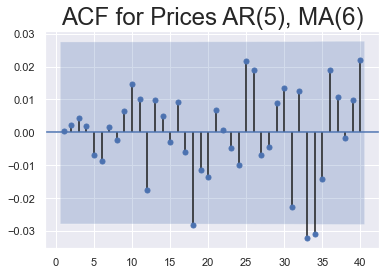

In [918]:
sgt.plot_acf(df2.residuals_ar5ma6, zero=False, lags=40)
plt.title("ACF for Prices AR(5), MA(6)", size=24)
plt.show()

In [924]:
mxr1 = ARMA(df2.market_value, order=(5, 6))
res_mxr1 = mxr1.fit(start_ar_lags=7)
mxr2 = ARMA(df2.returns[1:], order=(5, 1))
res_mxr2 = mxr2.fit()
print (f" ARMA(5,6) \tLLR: {res_mxr1.llf} \tAIC: {res_mxr1.aic}")
print (f" ARMA(5,1) \tLLR: {res_mxr2.llf} \tAIC: {res_mxr2.aic}")

 ARMA(5,6) 	LLR: -27587.862948163714 	AIC: 55201.72589632743
 ARMA(5,1) 	LLR: -7889.3112829470565 	AIC: 15794.622565894113


In [925]:
# This shows that ARMA(5,1) work quite well with stationary, than ARMA(5,6) working with Non-stationary data

# The ARIMA Model

In [ ]:
# So we've ARIMA model, which is optimized ARMA model to work with non-stationary data